In [23]:
import numpy as np
import pandas as pd

from datautility import *
from tqdm import tqdm
from dataset import MTBIDataset
from vnet import LNet

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## If Training Combine old data with new data
* old_data: 49 
* positive: 57
* negative: 48
* all: 154 samples

In [ ]:
old_index = np.arange(49) + 1
# old_index = np.delete(old_index, [1, 4, 6, 8, 10, 12, 14, 16, 21, 23, 26, 29, 33, 35, 37, 43])

positive_idx = np.arange(73) + 1
positive_idx = np.delete(positive_idx, [2, 7, 8, 15, 16, 17, 18, 19, 29, 33, 36, 52, 53, 56, 60, 65])

negative_idx = np.arange(53) + 1
negative_idx = np.delete(negative_idx, [5, 14, 15, 16, 47])

image_dict = np.concatenate ((old_index, positive_idx, negative_idx))

metric = ['ad', 'ak', 'awf', 'eas_De_par', 'eas_De_perp', 'eas_tort', 'FA', 'ias_Da', 'md', 'mk', 'rd', 'rk']
print('{} subjects with {} metrics each'.format(len(image_dict), len(metric)))

image_index = np.arange(154)

## If Training new data only
* Positive: 67 samples
* Negative: 50 samples

In [13]:
positive_idx = np.arange(73) + 1
positive_idx = np.delete(positive_idx, [8, 15, 16, 17, 29, 33])

negative_idx = np.arange(53) + 1
negative_idx = np.delete(negative_idx, [14, 15, 16])

image_dict = np.concatenate((positive_idx, negative_idx))

metric = ['ad', 'ak', 'awf', 'eas_De_par', 'eas_De_perp', 'eas_tort', 'FA', 'ias_Da', 'md', 'mk', 'rd', 'rk']
print('{} subjects with {} metrics each'.format(len(image_dict), len(metric)))

image_index = np.arange(117)

117 subjects with 12 metrics each


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [01:21<00:00,  5.18s/it]


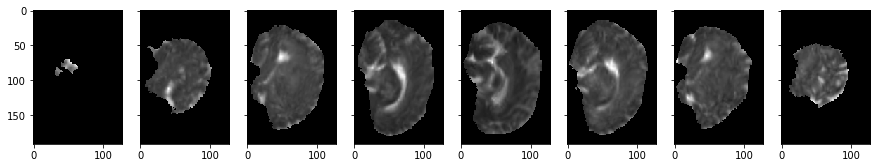

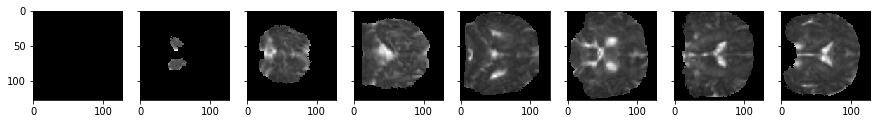

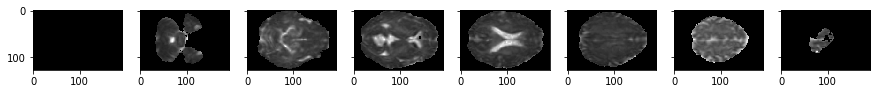

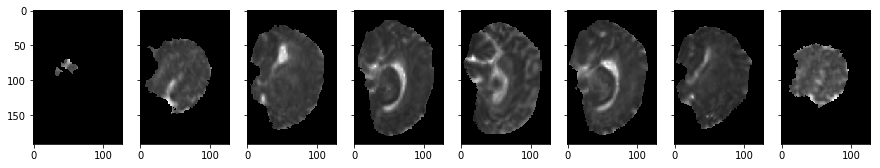

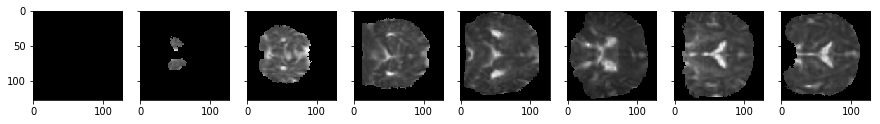

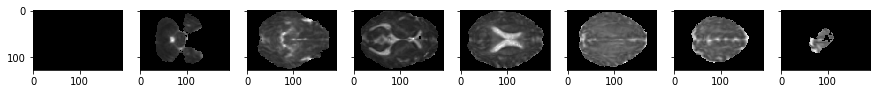

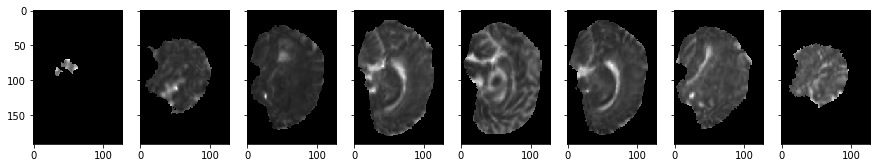

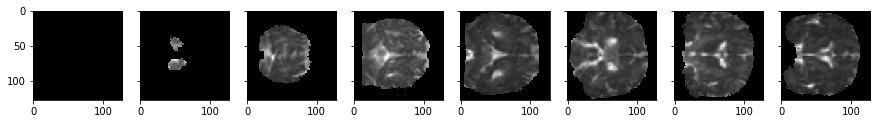

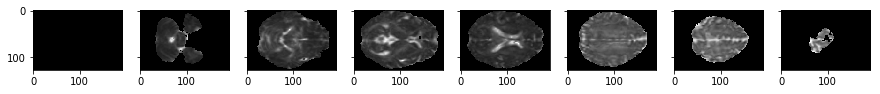

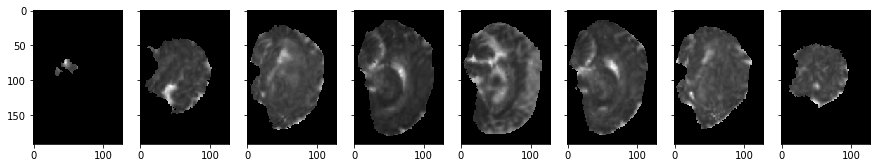

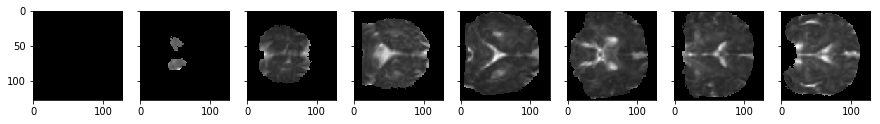

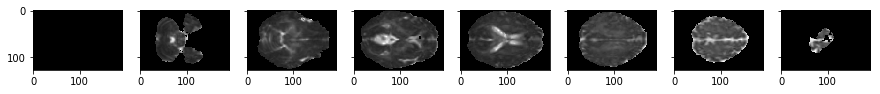

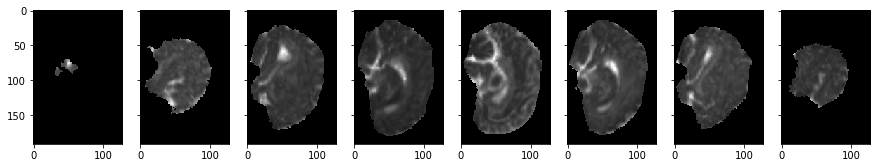

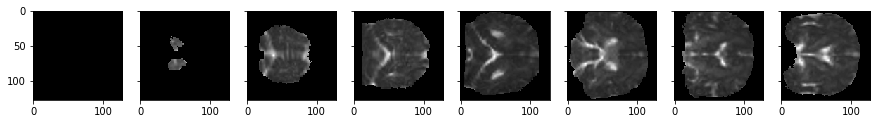

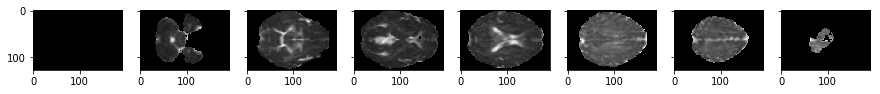

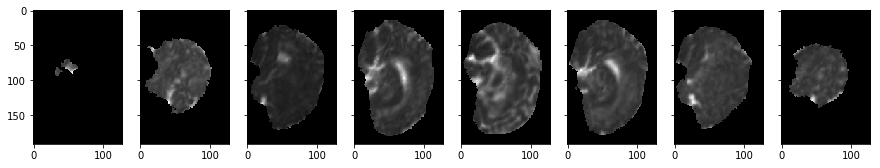

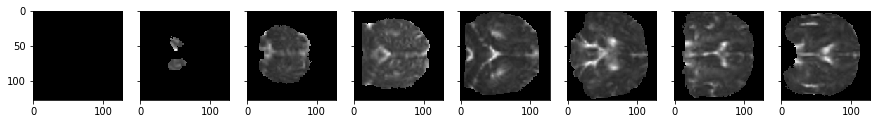

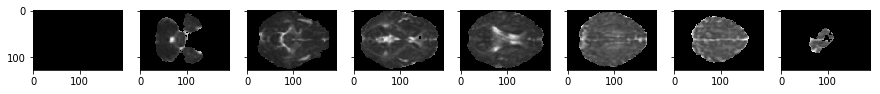

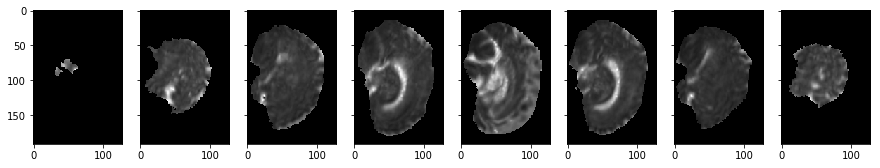

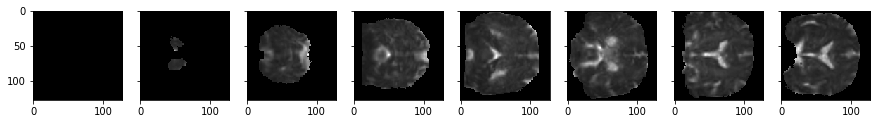

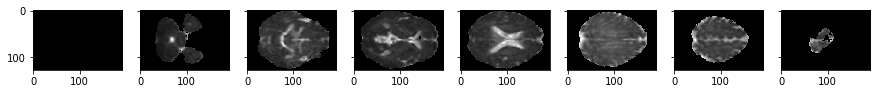

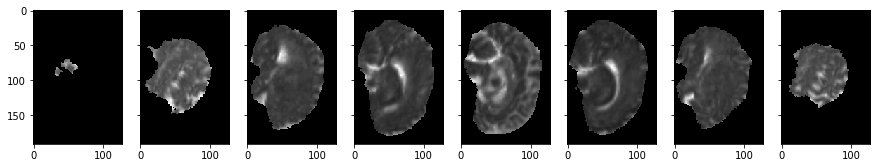

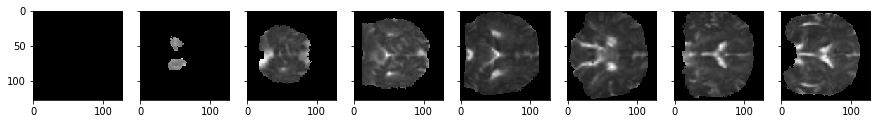

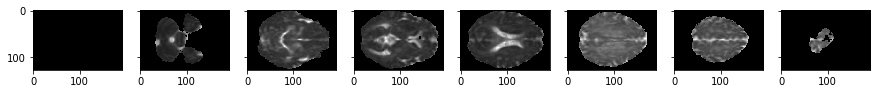

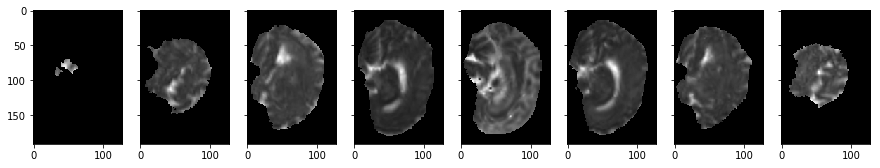

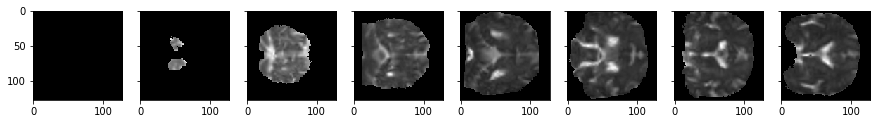

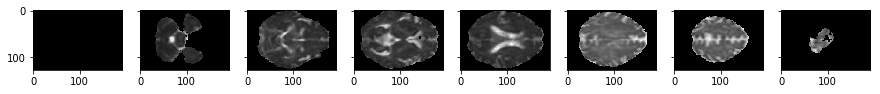

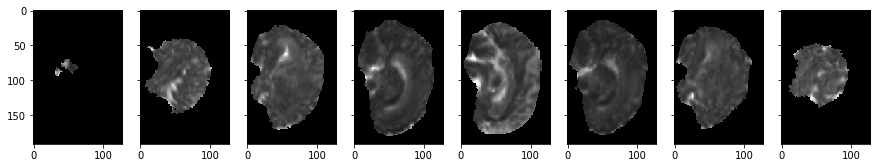

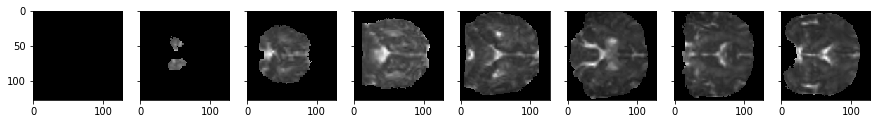

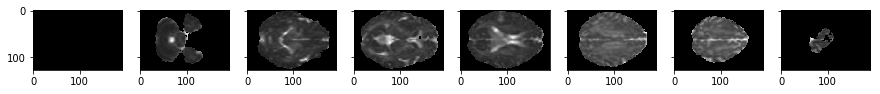

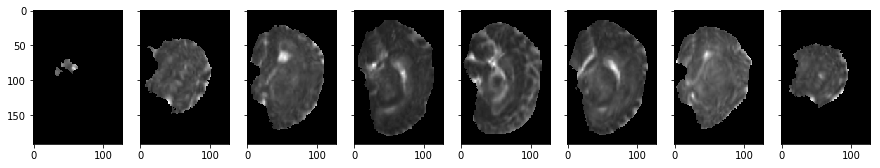

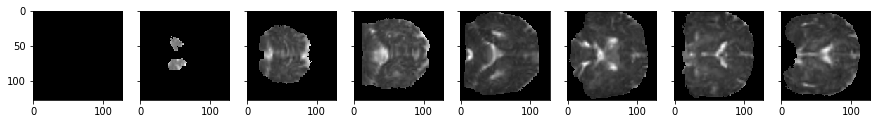

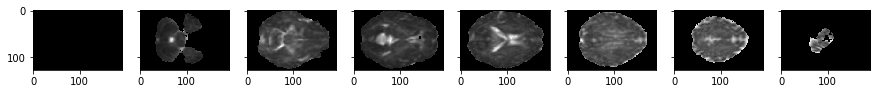

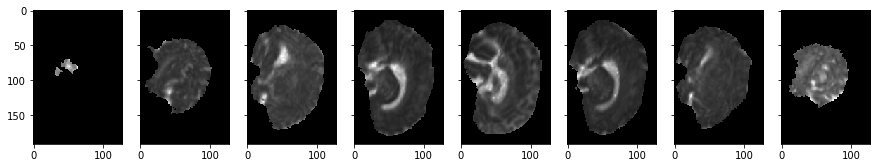

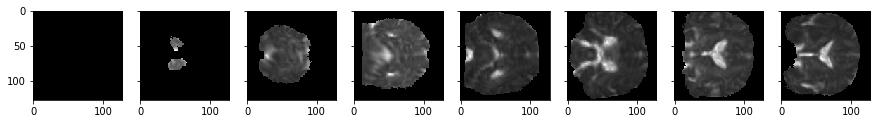

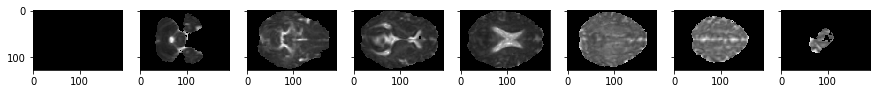

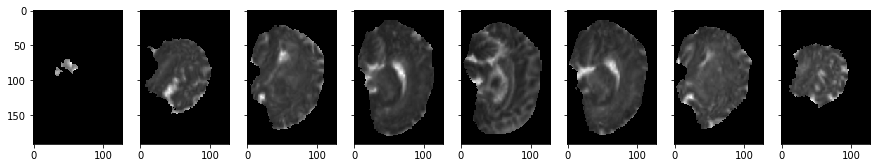

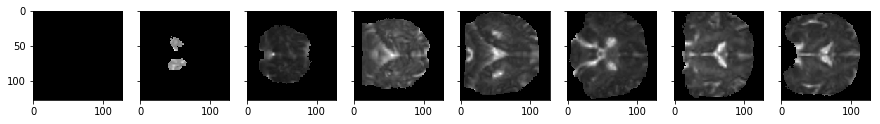

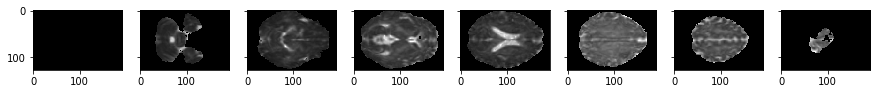

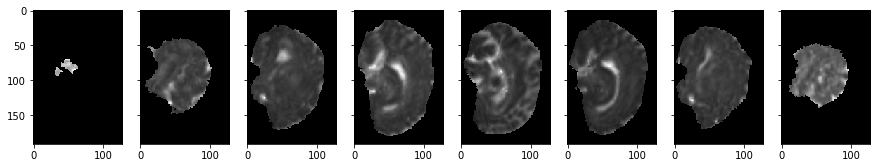

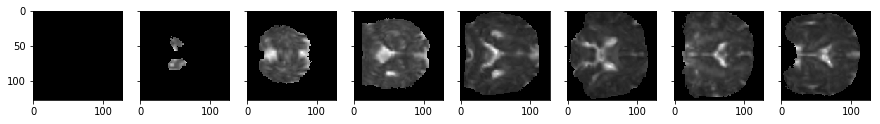

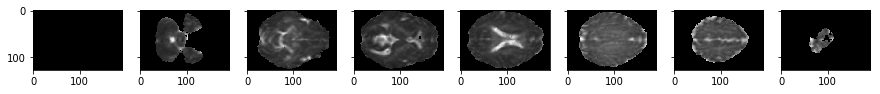

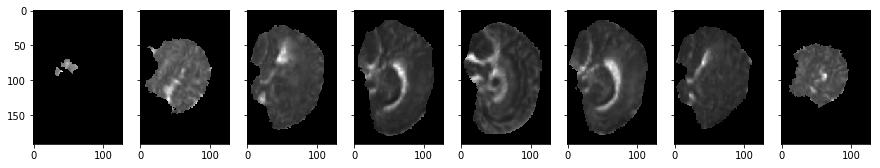

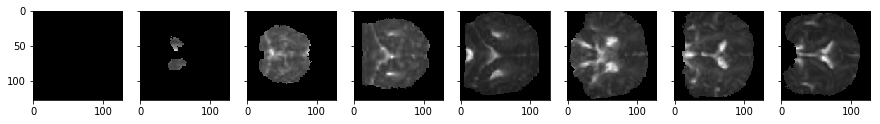

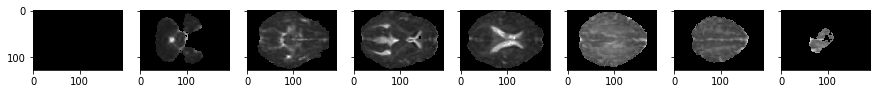

In [21]:
idx = np.arange(15)

for i in tqdm(idx):
    image = get_subject_data_new(i, image_dict, metric, shape=(128, 192, 128), verbose=False)
    show_slice(image[0], N=8) # show 2 channels only
    show_slice(image[0], N=8, axis=1) # show 2 channels only
    show_slice(image[0], N=8, axis=2) # show 2 channels only


In [8]:
data_set = MTBIDataset(image_dict, metric, transform=None, mode='new')

In [24]:
model = LNet(img_size=(64, 96, 64))